In [178]:
import pandas as pd
import numpy as np
#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import learning_curveimport numpy as np
from sklearn import *
import time
from sklearn.model_selection import train_test_split

## Reading Train and Test data

In [179]:
train = pd.read_csv("Train_sept.csv")
test=pd.read_csv("Test_sept.csv")

In [ ]:
#Check for duplicates

In [23]:
len(train[train.duplicated() == True])  

0

In [26]:
#Shape of dataset

In [27]:
train.shape

(188340, 10)

In [25]:
test.shape

(22265, 8)

Tried extracing features like month date week year from data but it did  not work

In [9]:
#df_train['Year'] = pd.to_datetime(df_train.Date).dt.year
#df_test['Year'] = pd.to_datetime(df_test.Date).dt.year
#df_train['Week'] = pd.to_datetime(df_train.Date).dt.week
#df_test['Week'] = pd.to_datetime(df_test.Date).dt.week
#df_train['day'] = pd.to_datetime(df_train.Date).dt.day
#df_test['day'] = pd.to_datetime(df_test.Date).dt.day
#df_train['Month'] = pd.to_datetime(df_train.Date).dt.month
#df_test['Month'] = pd.to_datetime(df_test.Date).dt.month
#festive={9:1,10:1,11:1,12:1}
#df_train["isfestive"]=df_train.Month.map(festive)
#df_train["isfestive"]=df_train["isfestive"].fillna(0)
#df_train["isfestive"]=df_train["isfestive"].astype('int32')
#df_test["isfestive"]=df_test.Month.map(festive)
#df_test["isfestive"]=df_test["isfestive"].fillna(0)
#df_test["isfestive"]=df_test["isfestive"].astype('int32')
#df_train['Qtr'] = pd.to_datetime(df_train.Date).dt.quarter
#df_test['Qtr'] = pd.to_datetime(df_test.Date).dt.quarter

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [12]:
#Check for missing value

In [13]:
train.isnull().sum() #NO MISSING Value

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [14]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

# Observation where sales is zero

In [19]:
train[train['Sales']<=0]

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
23867,T1023868,311,S4,L2,R2,2018-03-07,0,No,0,0.0
38143,T1038144,222,S4,L2,R2,2018-04-15,1,No,0,0.0
90458,T1090459,233,S1,L3,R3,2018-09-05,0,No,0,0.0
97301,T1097302,271,S1,L3,R2,2018-09-24,0,No,0,0.0
97480,T1097481,271,S1,L3,R2,2018-09-25,0,No,0,0.0
99489,T1099490,12,S1,L3,R2,2018-09-30,0,No,0,0.0
99904,T1099905,12,S1,L3,R2,2018-10-01,0,No,0,0.0
100215,T1100216,12,S1,L3,R2,2018-10-02,1,No,0,0.0
112564,T1112565,39,S4,L1,R1,2018-11-05,0,No,0,0.0
112853,T1112854,39,S4,L1,R1,2018-11-06,1,No,0,0.0


In [30]:
def custom_summry(train):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in train.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':train[col].count(),
                            'Minimum':train[col].min(),
                            'Quartile1':train[col].quantile(0.25),
                            'Mean':train[col].mean(),
                            'Median':train[col].median(),
                            'Quartile3':train[col].quantile(0.75),
                            'IQR':(train[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':train[col].max(),
                            'Variance':train[col].var(),
                            'Standard Deviation':train[col].std(),
                            'Skewness':train[col].skew(),
                            'Kurtosis':train[col].kurt()})
        
        #custom comment for identifying skew 
        
        if train[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= train[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= train[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= train[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= train[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif train[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in data[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [31]:
custom_summry(train)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### Train data Info

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [33]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in ID 188340
Unique values in Store_id 365
Unique values in Store_Type 4
Unique values in Location_Type 5
Unique values in Region_Code 4
Unique values in Date 516
Unique values in Holiday 2
Unique values in Discount 2
Unique values in #Order 299
Unique values in Sales 47422


In [34]:
for i in test.columns:
    print("Unique values in", i, test[i].nunique())
    

Unique values in ID 22265
Unique values in Store_id 365
Unique values in Store_Type 4
Unique values in Location_Type 5
Unique values in Region_Code 4
Unique values in Date 61
Unique values in Holiday 2
Unique values in Discount 2


In [ ]:
#handling the datetime column THIS APPROACH has not worked results are not good still tried this approach

In [ ]:
#df_train['Year'] = pd.to_datetime(df_train.Date).dt.year
#df_test['Year'] = pd.to_datetime(df_test.Date).dt.year
#df_train['Week'] = pd.to_datetime(df_train.Date).dt.week
#df_test['Week'] = pd.to_datetime(df_test.Date).dt.week
#df_train['day'] = pd.to_datetime(df_train.Date).dt.day
#df_test['day'] = pd.to_datetime(df_test.Date).dt.day
#df_train['Month'] = pd.to_datetime(df_train.Date).dt.month
#df_test['Month'] = pd.to_datetime(df_test.Date).dt.month
#festive={9:1,10:1,11:1,12:1}
#df_train["isfestive"]=df_train.Month.map(festive)
#df_train["isfestive"]=df_train["isfestive"].fillna(0)
#df_train["isfestive"]=df_train["isfestive"].astype('int32')
#df_test["isfestive"]=df_test.Month.map(festive)
#df_test["isfestive"]=df_test["isfestive"].fillna(0)
#df_test["isfestive"]=df_test["isfestive"].astype('int32')
#df_train['Qtr'] = pd.to_datetime(df_train.Date).dt.quarter
#df_test['Qtr'] = pd.to_datetime(df_test.Date).dt.quarter

# Separating  the catagorical and numerical variable

In [35]:
# list of numerical variables
numerical_features = ['#Order']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  1


,#Order
0,9
1,60
2,42
3,23
4,62


In [36]:
categorical_features=['Store_Type', 'Location_Type', 'Region_Code',  'Discount']
train[categorical_features].head()

,Store_Type,Location_Type,Region_Code,Discount
0,S1,L3,R1,Yes
1,S4,L2,R1,Yes
2,S3,L2,R1,Yes
3,S2,L3,R1,Yes
4,S2,L3,R4,Yes


In [37]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))
    

The feature is Store_Type and number of categories are 4
The feature is Location_Type and number of categories are 5
The feature is Region_Code and number of categories are 4
The feature is Discount and number of categories are 2


In [ ]:
Checking for multicollinearity

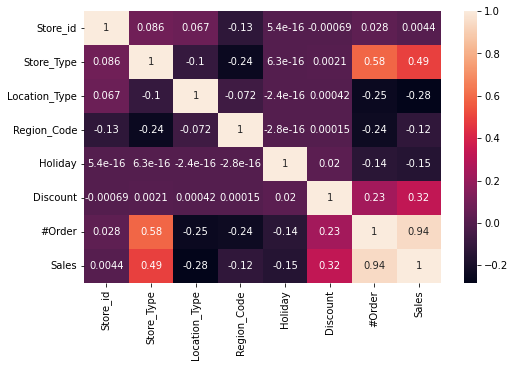

In [120]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Plotting the distribution plots of all numerical variables

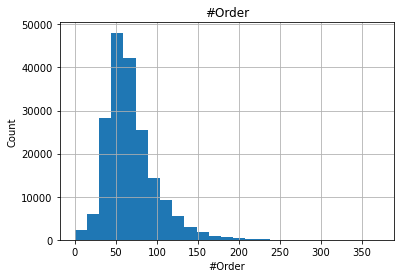

In [38]:
for feature in numerical_features:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [41]:
# Plotting the distribution plots of all catagorical variables

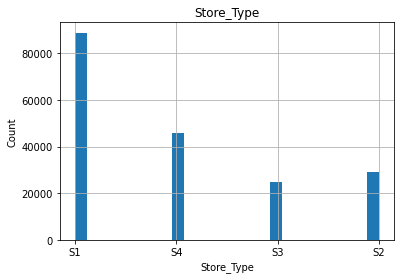

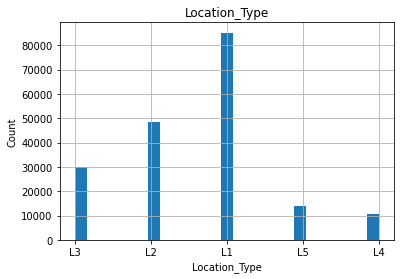

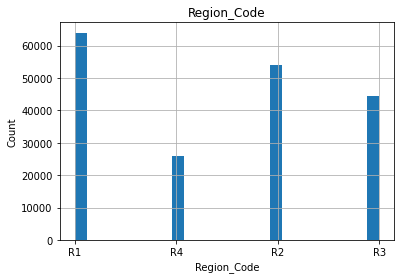

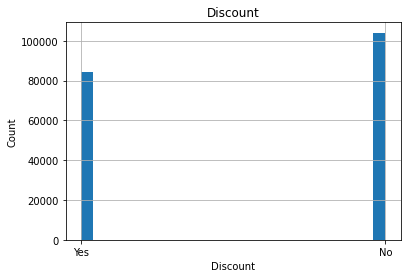

In [39]:
for feature in categorical_features:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
sns.pairplot(train,hue='Sales')

### Data Cleaning and Pre-Processing

#Univariate Analysis for Catagorical features 

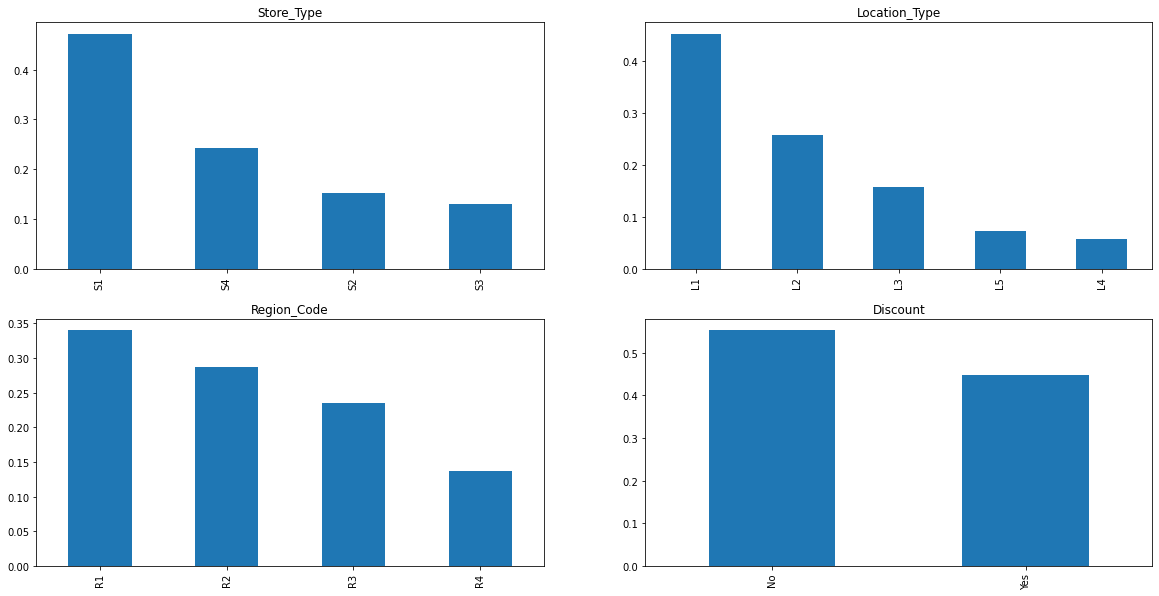

In [42]:
plt.figure(1)
plt.subplot(221)
train['Store_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Store_Type')

plt.subplot(222)
train['Location_Type'].value_counts(normalize=True).plot.bar(title= 'Location_Type')

plt.subplot(223)
train['Region_Code'].value_counts(normalize=True).plot.bar(title= 'Region_Code')
plt.subplot(224)
train['Discount'].value_counts(normalize=True).plot.bar(title= 'Discount')
plt.show()
#cat =['Gender', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product']

Form it can be infered that most customer are self employed, most of the people are not having any product

In [27]:
train['Store_Type'].value_counts(normalize=True) #ID	Store_Type	Location_Type	Region_Code	Date	Discoun

S1    0.471233
S4    0.243836
S2    0.153425
S3    0.131507
Name: Store_Type, dtype: float64

<AxesSubplot:>

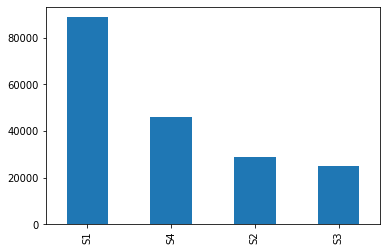

In [29]:
#Independent Variable (Categorical)
train['Store_Type'].value_counts().plot.bar()

S1 sore hase largest nos of stores

In [43]:
test['Store_Type'].value_counts(normalize=True)

S1    0.471233
S4    0.243836
S2    0.153425
S3    0.131507
Name: Store_Type, dtype: float64

<AxesSubplot:>

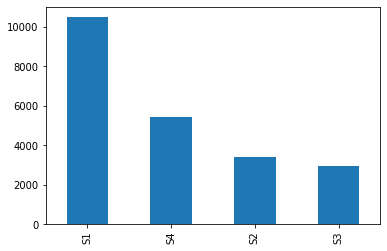

In [44]:
test['Store_Type'].value_counts().plot.bar()

In [45]:
train['Location_Type'].value_counts(normalize=True)

L1    0.452055
L2    0.257534
L3    0.158904
L5    0.073973
L4    0.057534
Name: Location_Type, dtype: float64

<AxesSubplot:>

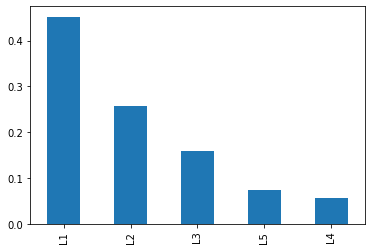

In [61]:
train['Location_Type'].value_counts(normalize=True).plot.bar()

In [47]:
test['Location_Type'].value_counts(normalize=True)

L1    0.452055
L2    0.257534
L3    0.158904
L5    0.073973
L4    0.057534
Name: Location_Type, dtype: float64

<AxesSubplot:>

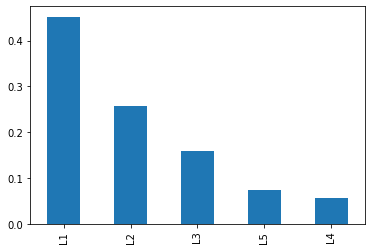

In [62]:
test['Location_Type'].value_counts(normalize=True).plot.bar()

In [49]:
train['Region_Code'].value_counts(normalize=True)

R1    0.339726
R2    0.287671
R3    0.235616
R4    0.136986
Name: Region_Code, dtype: float64

<AxesSubplot:>

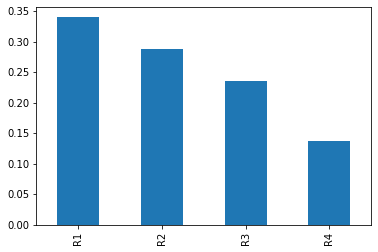

In [63]:
train['Region_Code'].value_counts(normalize=True).plot.bar()
#Most store are located in R1 region

In [64]:
train['Discount'].value_counts(normalize=True)

No     0.552464
Yes    0.447536
Name: Discount, dtype: float64

<AxesSubplot:>

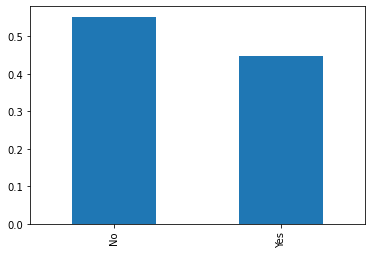

In [65]:
train['Discount'].value_counts(normalize=True).plot.bar()

In [66]:
train['Holiday'].value_counts(normalize=True)

0    0.868217
1    0.131783
Name: Holiday, dtype: float64

<AxesSubplot:>

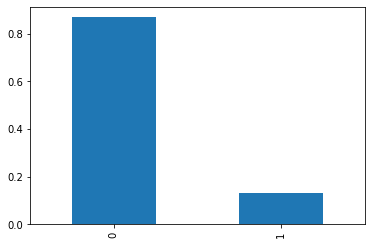

In [67]:
train['Holiday'].value_counts(normalize=True).plot.bar()

In [55]:
test['Holiday'].value_counts(normalize=True)

0    0.967213
1    0.032787
Name: Holiday, dtype: float64

<AxesSubplot:>

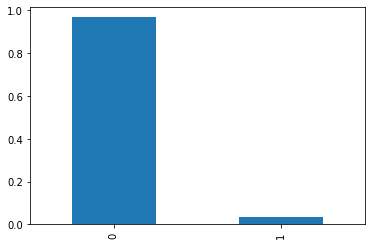

In [56]:
test['Holiday'].value_counts(normalize=True).plot.bar()

#Numerical Variable Analysis using distribution and boxplot

C:\Users\ihkha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



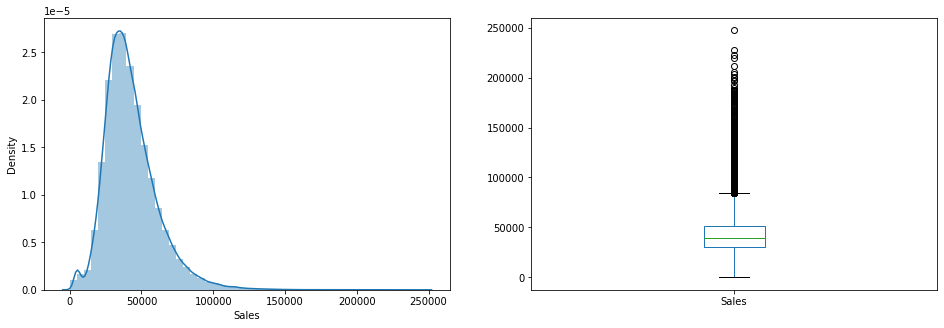

In [57]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Sales']);
plt.subplot(122)
train['Sales'].plot.box(figsize=(16,5))
plt.show()
#sales is right skewed

Tried taking log of train['sales'] to remove the effect of skewness it was not working

In [ ]:
#train['Sales']=np.log1p(train['Sales'])

C:\Users\ihkha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



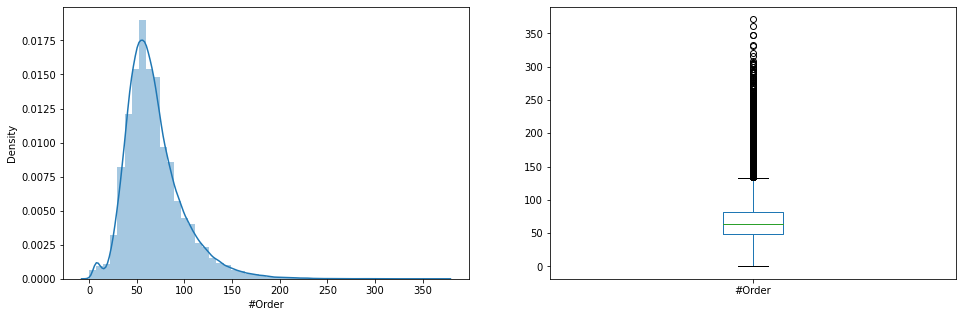

In [58]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['#Order']);
plt.subplot(122)
train['#Order'].plot.box(figsize=(16,5))
plt.show()
#sales is left skewed too many ouliers

In [78]:
#train['#Order']=np.log1p(train['#Order'])

C:\Users\ihkha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



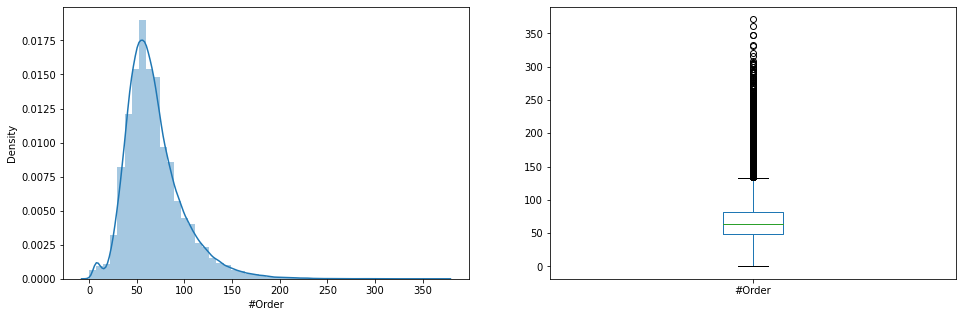

In [59]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['#Order']);
plt.subplot(122)
train['#Order'].plot.box(figsize=(16,5))
plt.show()
#orderis right skewed

# Now finding the relation between catogiralcal feature using count plot

<AxesSubplot:xlabel='Location_Type', ylabel='count'>

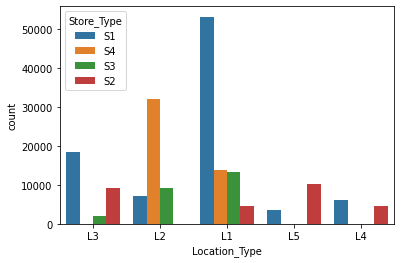

In [68]:
sns.countplot(x ='Location_Type', hue= "Store_Type",  data = train)

largest number of  store of S1 store type  are located in L1 location

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

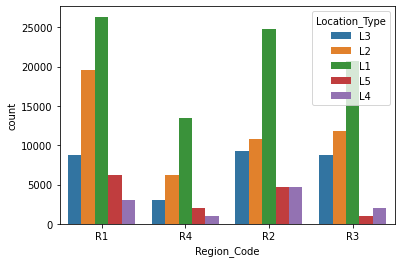

In [69]:
sns.countplot(x ='Region_Code', hue= "Location_Type",  data = train)

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

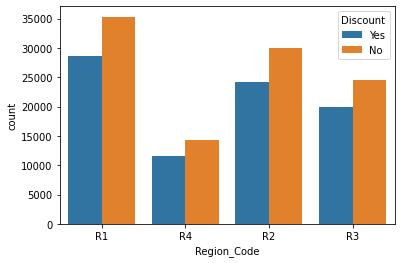

In [30]:
sns.countplot(x ='Region_Code', hue= "Discount",  data = train)

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

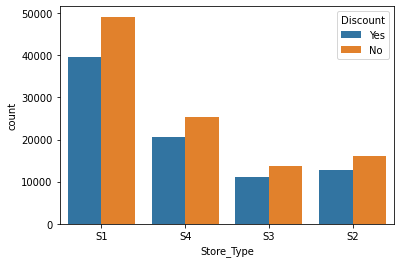

In [31]:
sns.countplot(x ='Store_Type', hue= "Discount",  data = train)

<AxesSubplot:xlabel='Holiday', ylabel='count'>

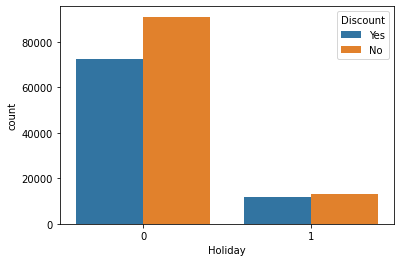

In [32]:
sns.countplot(x ='Holiday', hue= "Discount",  data = train)

# More discounts are given on day of holiday

In [ ]:
Married=pd.crosstab(train['Store_Type'],train['Loan_Status'])
Dependents=pd.crosstab(train['Location_Type'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [ ]:
sns.catplot(x = "Store_Type", y = "Sales", data = train.sort_values("Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

S4 store gives highest sale inspite of having half a number of  store as comapAred to S1.
S4 store gives highest sale as compared to s1 inspite OF one third a number of  store as comapared to S1.
S1 is not performing well

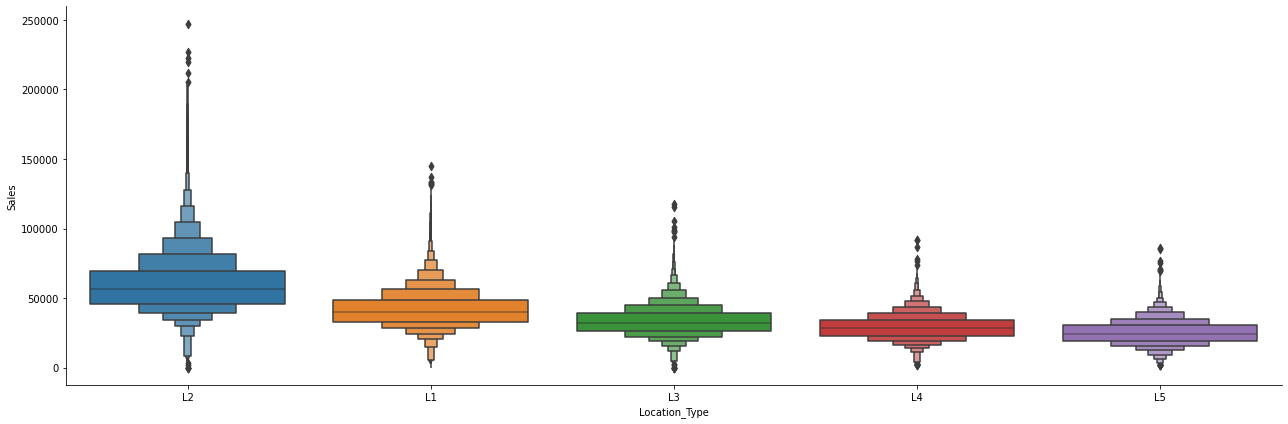

In [26]:
sns.catplot(x = "Location_Type", y = "Sales", data = train.sort_values("Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()
#L2 LOCATION TYPE GIVE HIGHEST SALE

In [ ]:
Location wise L2 is perfoming much better in terms of sales although L1 has double storeS as compared to L2
BUT L2 has highest sales that L1 is ot performing well as per capacity

In [ ]:
sns.catplot(x = "Region_Code", y = "Sales", data = train.sort_values("Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

REGION R1 GIVES BEST SALES also it has largest number of stores but R2 is performing much better to R3 inspite of having less store

In [ ]:
sns.catplot(x = "Discount", y = "Sales", data = train.sort_values("Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [72]:
#As per my null hypothesis when discount is given it leads to increase in sales

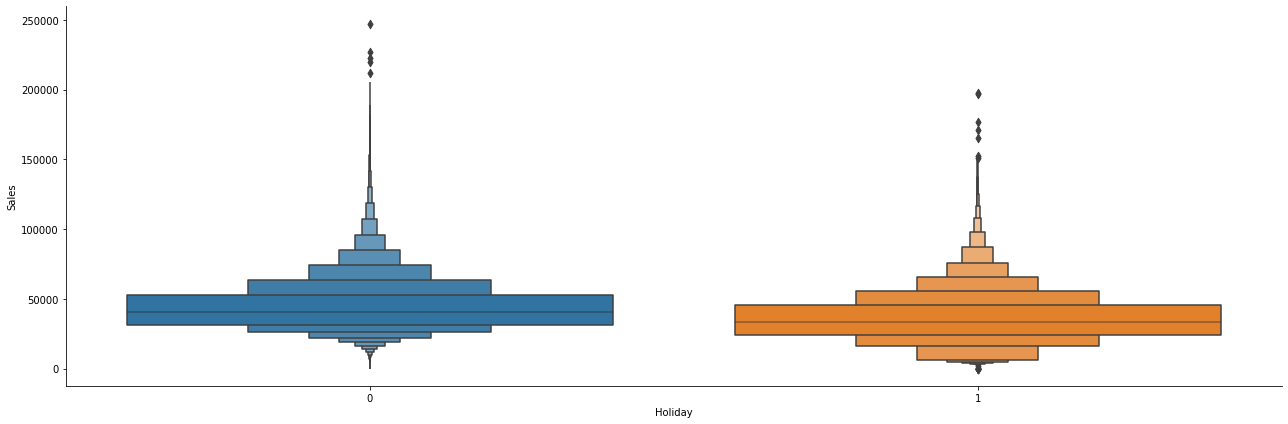

In [29]:
sns.catplot(x = "Holiday", y = "Sales", data = train.sort_values("Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()
#As per my null hypothesi More sales are done on holiday as people are free

#### Checking Correlation among features

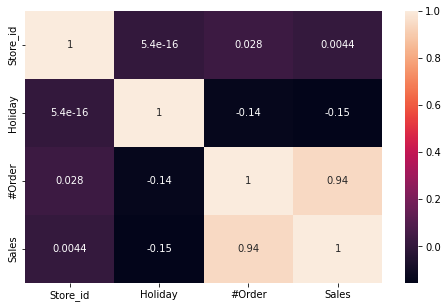

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True)
plt.show()


high multicolearity between order and sales which is 94% we can drop order

### Feature Engineering

#### Age Vs Annual premium

In [72]:
#sns.scatterplot(x=train['Age'],y=train['Avg_Account_Balance'])
#plt.show()

In [73]:
train.Credit_Product.value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

### Encoding Techniques

#### Label Encoding

In [180]:

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
train['Location_Type']= label_encoder.fit_transform(train['Location_Type'])
train['Region_Code']= label_encoder.fit_transform(train['Region_Code'])
train['Discount']= label_encoder.fit_transform(train['Discount'])
train['Holiday']= label_encoder.fit_transform(train['Holiday'])
train['Store_Type']= label_encoder.fit_transform(train['Store_Type'])

In [181]:
test['Location_Type']= label_encoder.fit_transform(test['Location_Type'])
test['Region_Code']= label_encoder.fit_transform(test['Region_Code'])
test['Discount']= label_encoder.fit_transform(test['Discount'])
test['Holiday']= label_encoder.fit_transform(test['Holiday'])
test['Store_Type']= label_encoder.fit_transform(test['Store_Type'])

In [182]:
train.drop(['Date'], axis = 1,inplace=True)

test.drop(['Date'], axis = 1,inplace=True)

y=train['Sales']

X=train.drop(['#Order'], axis = 1)

X=X.drop(['Sales'], axis = 1)

X.drop(['ID'], axis = 1,inplace=True)

In [185]:
test.drop(['ID'], axis = 1,inplace=True)

In [183]:
X.shape

(188340, 6)

In [186]:
test.shape

(22265, 6)

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [90]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='rmse'
 )

In [91]:
#model.fit(X_train, y_train)
model_2.fit(X_train, y_train, eval_metric='rmsle', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[0]	validation_0-rmsle:4.56121
[100]	validation_0-rmsle:0.52252
[200]	validation_0-rmsle:0.34957
[300]	validation_0-rmsle:0.33465
[400]	validation_0-rmsle:0.33399
[500]	validation_0-rmsle:0.33379
[600]	validation_0-rmsle:0.33333
[700]	validation_0-rmsle:0.33283
[800]	validation_0-rmsle:0.33234
[900]	validation_0-rmsle:0.33189
[1000]	validation_0-rmsle:0.33129
[1100]	validation_0-rmsle:0.33078
[1200]	validation_0-rmsle:0.33041
[1300]	validation_0-rmsle:0.33009
[1400]	validation_0-rmsle:0.32986
[1500]	validation_0-rmsle:0.32969
[1600]	validation_0-rmsle:0.32952
[1700]	validation_0-rmsle:0.32932
[1800]	validation_0-rmsle:0.32916
[1900]	validation_0-rmsle:0.32903
[2000]	validation_0-rmsle:0.32887
[2100]	validation_0-rmsle:0.32876
[2200]	validation_0-rmsle:0.32866
[2300]	validation_0-rmsle:0.32855
[2400]	validation_0-rmsle:0.32846
[2500]	validation_0-rmsle:0.32838
[2600]	validation_0-rmsle:0.32831
[2700]	validation_0-rmsle:0.32823
[2800]	validation_0-rmsle:0.32815
[2900]	validation_0-rmsle:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=8,
             num_parallel_tree=1, random_state=100, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=100, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [93]:
y_pred1=model_2.predict(test)

C:\Users\ihkha\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [94]:
sub = pd.read_csv('SAMPLE_sept.csv')
# replace your sales column to your predicted column

sub['Sales'] = y_pred1

# save this to csv format

sub.to_csv('submission_XGBOOST_22.csv', index=False)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.20, random_state=1)

In [103]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

In [104]:
param = {'objective': 'regression',
         'boosting': 'gbdt',
         'num_iterations': 3000,   
         'learning_rate': 0.06,  
         'num_leaves': 40,  
         'max_depth': 24,   
         'min_data_in_leaf':11,  
         'max_bin': 4, 
         'metric': 'l2_root'
         }

In [105]:
lgbm = lgb.train(params=param,
                 verbose_eval=1000,
                 train_set=train_data,
                 valid_sets=[test_data])

C:\Users\ihkha\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 6
[LightGBM] [Info] Start training from score 42756.905551
[1000]	valid_0's rmse: 12021.6
[2000]	valid_0's rmse: 12021.7
[3000]	valid_0's rmse: 12021.7


In [106]:
y_pred_lgbm = lgbm.predict(X_cv)

In [107]:
y_pred_lgmbm_3=lgbm.predict(test)

In [108]:
# replace your sales column to your predicted column

sub['Sales'] = y_pred_lgmbm_3

# save this to csv format

sub.to_csv('submission_lgbm_2.csv', index=False)

### Data Modelling and Evaluation

In [36]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error

# import packages for hyperparameters tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
#X_train, X_test, y_train, y_test = train_test_split(train, train_, test_size=0.20, random_state=42,stratify=train_target,shuffle=True)
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [189]:
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [190]:
from catboost import CatBoostRegressor
cbr=CatBoostRegressor()
cbr.fit(X,y)

Learning rate set to 0.099161
0:	learn: 17483.3441019	total: 34.2ms	remaining: 34.1s
1:	learn: 16651.6529341	total: 64.3ms	remaining: 32.1s
2:	learn: 15944.8118099	total: 94.8ms	remaining: 31.5s
3:	learn: 15348.7448009	total: 125ms	remaining: 31s
4:	learn: 14839.3708976	total: 158ms	remaining: 31.4s
5:	learn: 14412.2970817	total: 189ms	remaining: 31.3s
6:	learn: 14046.6251695	total: 219ms	remaining: 31.1s
7:	learn: 13736.5766067	total: 249ms	remaining: 30.9s
8:	learn: 13479.7057004	total: 278ms	remaining: 30.6s
9:	learn: 13266.6049860	total: 307ms	remaining: 30.4s
10:	learn: 13091.4369221	total: 341ms	remaining: 30.6s
11:	learn: 12939.8908243	total: 374ms	remaining: 30.8s
12:	learn: 12812.8188887	total: 403ms	remaining: 30.6s
13:	learn: 12706.3100896	total: 432ms	remaining: 30.4s
14:	learn: 12601.7556010	total: 461ms	remaining: 30.3s
15:	learn: 12508.6123754	total: 490ms	remaining: 30.2s
16:	learn: 12444.8152489	total: 522ms	remaining: 30.2s
17:	learn: 12392.0431999	total: 553ms	remain

154:	learn: 11335.1168873	total: 4.68s	remaining: 25.5s
155:	learn: 11333.0754272	total: 4.72s	remaining: 25.5s
156:	learn: 11331.9213353	total: 4.75s	remaining: 25.5s
157:	learn: 11331.1305153	total: 4.78s	remaining: 25.5s
158:	learn: 11328.1740196	total: 4.81s	remaining: 25.4s
159:	learn: 11323.8100992	total: 4.84s	remaining: 25.4s
160:	learn: 11323.2622177	total: 4.87s	remaining: 25.4s
161:	learn: 11321.6207480	total: 4.9s	remaining: 25.3s
162:	learn: 11320.9174525	total: 4.93s	remaining: 25.3s
163:	learn: 11318.0317944	total: 4.96s	remaining: 25.3s
164:	learn: 11313.2797330	total: 4.98s	remaining: 25.2s
165:	learn: 11312.4542240	total: 5.01s	remaining: 25.2s
166:	learn: 11309.4772471	total: 5.04s	remaining: 25.1s
167:	learn: 11305.5345758	total: 5.07s	remaining: 25.1s
168:	learn: 11301.6585663	total: 5.1s	remaining: 25.1s
169:	learn: 11299.3518805	total: 5.13s	remaining: 25s
170:	learn: 11295.4204875	total: 5.16s	remaining: 25s
171:	learn: 11292.1157717	total: 5.19s	remaining: 25s


306:	learn: 11119.4876349	total: 9.14s	remaining: 20.6s
307:	learn: 11117.8847517	total: 9.17s	remaining: 20.6s
308:	learn: 11117.6421862	total: 9.2s	remaining: 20.6s
309:	learn: 11116.9168011	total: 9.22s	remaining: 20.5s
310:	learn: 11116.1329843	total: 9.25s	remaining: 20.5s
311:	learn: 11115.1927898	total: 9.28s	remaining: 20.5s
312:	learn: 11115.0148001	total: 9.31s	remaining: 20.4s
313:	learn: 11112.8107616	total: 9.34s	remaining: 20.4s
314:	learn: 11111.1136282	total: 9.37s	remaining: 20.4s
315:	learn: 11110.0268546	total: 9.4s	remaining: 20.4s
316:	learn: 11108.6437807	total: 9.43s	remaining: 20.3s
317:	learn: 11107.9567335	total: 9.46s	remaining: 20.3s
318:	learn: 11107.6291215	total: 9.49s	remaining: 20.3s
319:	learn: 11107.3870134	total: 9.52s	remaining: 20.2s
320:	learn: 11105.9158369	total: 9.55s	remaining: 20.2s
321:	learn: 11104.3600555	total: 9.58s	remaining: 20.2s
322:	learn: 11102.9648464	total: 9.61s	remaining: 20.1s
323:	learn: 11102.6753023	total: 9.64s	remaining: 

455:	learn: 11024.8299941	total: 13.8s	remaining: 16.4s
456:	learn: 11024.4411278	total: 13.8s	remaining: 16.4s
457:	learn: 11024.2305870	total: 13.8s	remaining: 16.4s
458:	learn: 11023.7731161	total: 13.9s	remaining: 16.3s
459:	learn: 11023.3166024	total: 13.9s	remaining: 16.3s
460:	learn: 11022.9148927	total: 13.9s	remaining: 16.3s
461:	learn: 11022.3399989	total: 14s	remaining: 16.3s
462:	learn: 11021.7620757	total: 14s	remaining: 16.2s
463:	learn: 11021.1573954	total: 14s	remaining: 16.2s
464:	learn: 11020.4327390	total: 14s	remaining: 16.1s
465:	learn: 11020.3340304	total: 14s	remaining: 16.1s
466:	learn: 11019.4430311	total: 14.1s	remaining: 16.1s
467:	learn: 11018.6337390	total: 14.1s	remaining: 16s
468:	learn: 11018.0050966	total: 14.1s	remaining: 16s
469:	learn: 11017.4202978	total: 14.1s	remaining: 15.9s
470:	learn: 11017.1585755	total: 14.2s	remaining: 15.9s
471:	learn: 11016.6812653	total: 14.2s	remaining: 15.9s
472:	learn: 11016.1052027	total: 14.2s	remaining: 15.8s
473:	l

604:	learn: 10972.7018952	total: 18s	remaining: 11.8s
605:	learn: 10972.2959421	total: 18s	remaining: 11.7s
606:	learn: 10971.9112915	total: 18.1s	remaining: 11.7s
607:	learn: 10971.6094350	total: 18.1s	remaining: 11.7s
608:	learn: 10971.1689496	total: 18.1s	remaining: 11.6s
609:	learn: 10971.0065725	total: 18.2s	remaining: 11.6s
610:	learn: 10970.9675580	total: 18.2s	remaining: 11.6s
611:	learn: 10970.6792069	total: 18.2s	remaining: 11.6s
612:	learn: 10970.6052741	total: 18.3s	remaining: 11.5s
613:	learn: 10970.3145778	total: 18.3s	remaining: 11.5s
614:	learn: 10970.1314453	total: 18.3s	remaining: 11.5s
615:	learn: 10970.0037824	total: 18.3s	remaining: 11.4s
616:	learn: 10969.9702234	total: 18.4s	remaining: 11.4s
617:	learn: 10969.7489405	total: 18.4s	remaining: 11.4s
618:	learn: 10969.4519537	total: 18.4s	remaining: 11.3s
619:	learn: 10969.1674982	total: 18.5s	remaining: 11.3s
620:	learn: 10969.0616990	total: 18.5s	remaining: 11.3s
621:	learn: 10968.9114822	total: 18.5s	remaining: 11

755:	learn: 10945.1374675	total: 22.6s	remaining: 7.28s
756:	learn: 10944.9842749	total: 22.6s	remaining: 7.25s
757:	learn: 10944.8691133	total: 22.6s	remaining: 7.22s
758:	learn: 10944.6646185	total: 22.7s	remaining: 7.19s
759:	learn: 10944.5676516	total: 22.7s	remaining: 7.16s
760:	learn: 10944.4437621	total: 22.7s	remaining: 7.13s
761:	learn: 10944.1720343	total: 22.7s	remaining: 7.1s
762:	learn: 10944.1031558	total: 22.8s	remaining: 7.07s
763:	learn: 10944.0385812	total: 22.8s	remaining: 7.04s
764:	learn: 10943.6715722	total: 22.8s	remaining: 7.01s
765:	learn: 10943.5824902	total: 22.9s	remaining: 6.98s
766:	learn: 10943.5241281	total: 22.9s	remaining: 6.95s
767:	learn: 10943.2770255	total: 22.9s	remaining: 6.92s
768:	learn: 10943.1568542	total: 22.9s	remaining: 6.89s
769:	learn: 10943.0465551	total: 23s	remaining: 6.86s
770:	learn: 10942.9011766	total: 23s	remaining: 6.83s
771:	learn: 10942.7285421	total: 23s	remaining: 6.8s
772:	learn: 10942.5648611	total: 23.1s	remaining: 6.77s


904:	learn: 10927.2508897	total: 27s	remaining: 2.83s
905:	learn: 10927.0641901	total: 27s	remaining: 2.8s
906:	learn: 10927.0132533	total: 27.1s	remaining: 2.77s
907:	learn: 10926.9582020	total: 27.1s	remaining: 2.74s
908:	learn: 10926.9039329	total: 27.1s	remaining: 2.71s
909:	learn: 10926.8717621	total: 27.1s	remaining: 2.68s
910:	learn: 10926.8116043	total: 27.2s	remaining: 2.65s
911:	learn: 10926.7617141	total: 27.2s	remaining: 2.62s
912:	learn: 10926.5647252	total: 27.2s	remaining: 2.59s
913:	learn: 10926.5053828	total: 27.3s	remaining: 2.56s
914:	learn: 10926.4310096	total: 27.3s	remaining: 2.53s
915:	learn: 10926.3878814	total: 27.3s	remaining: 2.5s
916:	learn: 10926.2092374	total: 27.3s	remaining: 2.47s
917:	learn: 10926.1624913	total: 27.4s	remaining: 2.44s
918:	learn: 10926.0136279	total: 27.4s	remaining: 2.41s
919:	learn: 10925.9020012	total: 27.4s	remaining: 2.38s
920:	learn: 10925.8573243	total: 27.5s	remaining: 2.35s
921:	learn: 10925.7613017	total: 27.5s	remaining: 2.33

In [116]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=cbr,scoring='neg_root_mean_squared_error',cv=5)

Learning rate set to 0.095299
0:	learn: 17747.3425718	total: 28.7ms	remaining: 28.7s
1:	learn: 16935.0680764	total: 54.7ms	remaining: 27.3s
2:	learn: 16233.7577068	total: 79.5ms	remaining: 26.4s
3:	learn: 15635.4350793	total: 106ms	remaining: 26.3s
4:	learn: 15122.9742921	total: 131ms	remaining: 26s
5:	learn: 14688.7296982	total: 158ms	remaining: 26.1s
6:	learn: 14319.9700938	total: 184ms	remaining: 26.1s
7:	learn: 14005.4223296	total: 208ms	remaining: 25.8s
8:	learn: 13742.1772784	total: 233ms	remaining: 25.6s
9:	learn: 13516.7028140	total: 256ms	remaining: 25.4s
10:	learn: 13329.2918678	total: 281ms	remaining: 25.3s
11:	learn: 13167.4916162	total: 306ms	remaining: 25.2s
12:	learn: 13035.6412884	total: 334ms	remaining: 25.3s
13:	learn: 12921.5457111	total: 361ms	remaining: 25.4s
14:	learn: 12810.7450383	total: 384ms	remaining: 25.2s
15:	learn: 12727.5329517	total: 408ms	remaining: 25.1s
16:	learn: 12658.9440321	total: 432ms	remaining: 25s
17:	learn: 12601.0671276	total: 456ms	remainin

149:	learn: 11474.8523355	total: 3.79s	remaining: 21.5s
150:	learn: 11473.7249868	total: 3.82s	remaining: 21.5s
151:	learn: 11472.7168429	total: 3.85s	remaining: 21.5s
152:	learn: 11464.8010920	total: 3.88s	remaining: 21.5s
153:	learn: 11462.4863655	total: 3.9s	remaining: 21.4s
154:	learn: 11461.2077801	total: 3.93s	remaining: 21.4s
155:	learn: 11458.9750998	total: 3.95s	remaining: 21.4s
156:	learn: 11458.1263544	total: 3.98s	remaining: 21.3s
157:	learn: 11451.1438452	total: 4s	remaining: 21.3s
158:	learn: 11447.8642426	total: 4.02s	remaining: 21.3s
159:	learn: 11446.0409004	total: 4.05s	remaining: 21.2s
160:	learn: 11445.2330631	total: 4.07s	remaining: 21.2s
161:	learn: 11440.6937951	total: 4.09s	remaining: 21.2s
162:	learn: 11436.8993325	total: 4.12s	remaining: 21.2s
163:	learn: 11434.9396235	total: 4.14s	remaining: 21.1s
164:	learn: 11433.7516395	total: 4.17s	remaining: 21.1s
165:	learn: 11432.0361835	total: 4.2s	remaining: 21.1s
166:	learn: 11431.4440039	total: 4.23s	remaining: 21.

298:	learn: 11230.1148986	total: 7.18s	remaining: 16.8s
299:	learn: 11229.5143078	total: 7.21s	remaining: 16.8s
300:	learn: 11228.1947099	total: 7.24s	remaining: 16.8s
301:	learn: 11226.8963443	total: 7.26s	remaining: 16.8s
302:	learn: 11226.6457910	total: 7.28s	remaining: 16.8s
303:	learn: 11225.7525464	total: 7.31s	remaining: 16.7s
304:	learn: 11224.6194546	total: 7.34s	remaining: 16.7s
305:	learn: 11224.1115618	total: 7.37s	remaining: 16.7s
306:	learn: 11223.9109750	total: 7.39s	remaining: 16.7s
307:	learn: 11223.5697548	total: 7.41s	remaining: 16.7s
308:	learn: 11222.8335854	total: 7.44s	remaining: 16.6s
309:	learn: 11222.1386685	total: 7.46s	remaining: 16.6s
310:	learn: 11222.0266058	total: 7.48s	remaining: 16.6s
311:	learn: 11221.8780692	total: 7.5s	remaining: 16.5s
312:	learn: 11221.3581855	total: 7.53s	remaining: 16.5s
313:	learn: 11219.9001688	total: 7.56s	remaining: 16.5s
314:	learn: 11218.3936897	total: 7.58s	remaining: 16.5s
315:	learn: 11217.6231771	total: 7.61s	remaining:

446:	learn: 11127.1919363	total: 10.9s	remaining: 13.5s
447:	learn: 11126.7344714	total: 11s	remaining: 13.5s
448:	learn: 11125.9293252	total: 11s	remaining: 13.5s
449:	learn: 11125.0614718	total: 11s	remaining: 13.5s
450:	learn: 11124.2804778	total: 11s	remaining: 13.4s
451:	learn: 11123.9483356	total: 11.1s	remaining: 13.4s
452:	learn: 11122.7630486	total: 11.1s	remaining: 13.4s
453:	learn: 11122.5701787	total: 11.1s	remaining: 13.4s
454:	learn: 11122.1858309	total: 11.1s	remaining: 13.3s
455:	learn: 11121.7551368	total: 11.2s	remaining: 13.3s
456:	learn: 11121.2108601	total: 11.2s	remaining: 13.3s
457:	learn: 11120.7634913	total: 11.2s	remaining: 13.3s
458:	learn: 11120.1302118	total: 11.2s	remaining: 13.2s
459:	learn: 11119.6735809	total: 11.3s	remaining: 13.2s
460:	learn: 11119.0905716	total: 11.3s	remaining: 13.2s
461:	learn: 11118.6384255	total: 11.3s	remaining: 13.2s
462:	learn: 11118.3529147	total: 11.3s	remaining: 13.1s
463:	learn: 11118.2597215	total: 11.4s	remaining: 13.1s


600:	learn: 11066.4287634	total: 14.7s	remaining: 9.79s
601:	learn: 11066.0657184	total: 14.8s	remaining: 9.76s
602:	learn: 11065.6235017	total: 14.8s	remaining: 9.74s
603:	learn: 11065.3523550	total: 14.8s	remaining: 9.71s
604:	learn: 11065.2663240	total: 14.8s	remaining: 9.69s
605:	learn: 11064.9868159	total: 14.9s	remaining: 9.67s
606:	learn: 11064.5415744	total: 14.9s	remaining: 9.64s
607:	learn: 11064.1187846	total: 14.9s	remaining: 9.62s
608:	learn: 11063.9757579	total: 14.9s	remaining: 9.6s
609:	learn: 11063.6992054	total: 15s	remaining: 9.57s
610:	learn: 11063.4697183	total: 15s	remaining: 9.55s
611:	learn: 11063.2274958	total: 15s	remaining: 9.53s
612:	learn: 11062.9281303	total: 15s	remaining: 9.5s
613:	learn: 11062.8708859	total: 15.1s	remaining: 9.48s
614:	learn: 11062.6378425	total: 15.1s	remaining: 9.45s
615:	learn: 11062.1003537	total: 15.1s	remaining: 9.43s
616:	learn: 11061.8323686	total: 15.1s	remaining: 9.4s
617:	learn: 11061.6865494	total: 15.2s	remaining: 9.38s
618

754:	learn: 11032.4779386	total: 18.6s	remaining: 6.03s
755:	learn: 11032.1742153	total: 18.6s	remaining: 6s
756:	learn: 11031.9143540	total: 18.6s	remaining: 5.98s
757:	learn: 11031.5964562	total: 18.7s	remaining: 5.96s
758:	learn: 11031.2737655	total: 18.7s	remaining: 5.93s
759:	learn: 11031.1380837	total: 18.7s	remaining: 5.91s
760:	learn: 11031.0425067	total: 18.7s	remaining: 5.88s
761:	learn: 11030.9178406	total: 18.8s	remaining: 5.86s
762:	learn: 11030.7622407	total: 18.8s	remaining: 5.83s
763:	learn: 11030.1860848	total: 18.8s	remaining: 5.81s
764:	learn: 11029.8561332	total: 18.8s	remaining: 5.79s
765:	learn: 11029.5483844	total: 18.9s	remaining: 5.76s
766:	learn: 11029.4066208	total: 18.9s	remaining: 5.74s
767:	learn: 11029.1952944	total: 18.9s	remaining: 5.71s
768:	learn: 11029.0928584	total: 18.9s	remaining: 5.69s
769:	learn: 11029.0252222	total: 19s	remaining: 5.66s
770:	learn: 11028.9771038	total: 19s	remaining: 5.64s
771:	learn: 11028.7679981	total: 19s	remaining: 5.62s
7

909:	learn: 11009.3248618	total: 22.1s	remaining: 2.19s
910:	learn: 11009.2434884	total: 22.1s	remaining: 2.16s
911:	learn: 11008.9600994	total: 22.2s	remaining: 2.14s
912:	learn: 11008.7032358	total: 22.2s	remaining: 2.11s
913:	learn: 11008.6602590	total: 22.2s	remaining: 2.09s
914:	learn: 11008.5518750	total: 22.2s	remaining: 2.06s
915:	learn: 11008.3646679	total: 22.3s	remaining: 2.04s
916:	learn: 11008.2038810	total: 22.3s	remaining: 2.02s
917:	learn: 11008.1629556	total: 22.3s	remaining: 1.99s
918:	learn: 11008.1390890	total: 22.3s	remaining: 1.97s
919:	learn: 11008.0193427	total: 22.4s	remaining: 1.94s
920:	learn: 11007.9718908	total: 22.4s	remaining: 1.92s
921:	learn: 11007.8988489	total: 22.4s	remaining: 1.9s
922:	learn: 11007.8023302	total: 22.4s	remaining: 1.87s
923:	learn: 11007.6681884	total: 22.5s	remaining: 1.85s
924:	learn: 11007.5895673	total: 22.5s	remaining: 1.82s
925:	learn: 11007.5039010	total: 22.5s	remaining: 1.8s
926:	learn: 11007.4350872	total: 22.5s	remaining: 

62:	learn: 11716.0534848	total: 1.7s	remaining: 25.3s
63:	learn: 11709.1429373	total: 1.73s	remaining: 25.2s
64:	learn: 11706.2976515	total: 1.75s	remaining: 25.2s
65:	learn: 11701.1665420	total: 1.77s	remaining: 25.1s
66:	learn: 11697.0503554	total: 1.8s	remaining: 25s
67:	learn: 11686.6404364	total: 1.82s	remaining: 25s
68:	learn: 11682.1998008	total: 1.85s	remaining: 24.9s
69:	learn: 11677.4757545	total: 1.87s	remaining: 24.8s
70:	learn: 11672.1598740	total: 1.9s	remaining: 24.8s
71:	learn: 11671.1660207	total: 1.92s	remaining: 24.7s
72:	learn: 11668.3301646	total: 1.94s	remaining: 24.7s
73:	learn: 11664.3275489	total: 1.97s	remaining: 24.6s
74:	learn: 11660.4257696	total: 1.99s	remaining: 24.6s
75:	learn: 11657.5674925	total: 2.01s	remaining: 24.5s
76:	learn: 11651.3804295	total: 2.04s	remaining: 24.4s
77:	learn: 11646.8925216	total: 2.06s	remaining: 24.4s
78:	learn: 11640.8550892	total: 2.09s	remaining: 24.3s
79:	learn: 11637.3090111	total: 2.11s	remaining: 24.3s
80:	learn: 11635.

214:	learn: 11291.5052585	total: 5.47s	remaining: 20s
215:	learn: 11289.7667838	total: 5.49s	remaining: 19.9s
216:	learn: 11287.8824042	total: 5.52s	remaining: 19.9s
217:	learn: 11286.8392175	total: 5.55s	remaining: 19.9s
218:	learn: 11285.8785605	total: 5.57s	remaining: 19.9s
219:	learn: 11284.4009389	total: 5.61s	remaining: 19.9s
220:	learn: 11283.9810020	total: 5.64s	remaining: 19.9s
221:	learn: 11283.5111212	total: 5.67s	remaining: 19.9s
222:	learn: 11282.8878273	total: 5.69s	remaining: 19.8s
223:	learn: 11281.7249363	total: 5.71s	remaining: 19.8s
224:	learn: 11280.3266754	total: 5.72s	remaining: 19.7s
225:	learn: 11279.3562928	total: 5.75s	remaining: 19.7s
226:	learn: 11278.7015206	total: 5.77s	remaining: 19.6s
227:	learn: 11275.6121851	total: 5.79s	remaining: 19.6s
228:	learn: 11273.4393931	total: 5.82s	remaining: 19.6s
229:	learn: 11272.4345495	total: 5.85s	remaining: 19.6s
230:	learn: 11271.3004057	total: 5.88s	remaining: 19.6s
231:	learn: 11270.2881251	total: 5.9s	remaining: 1

368:	learn: 11141.9532067	total: 9.29s	remaining: 15.9s
369:	learn: 11141.7116238	total: 9.32s	remaining: 15.9s
370:	learn: 11141.1624603	total: 9.34s	remaining: 15.8s
371:	learn: 11140.9863036	total: 9.37s	remaining: 15.8s
372:	learn: 11140.5232165	total: 9.39s	remaining: 15.8s
373:	learn: 11140.2216126	total: 9.42s	remaining: 15.8s
374:	learn: 11139.1313165	total: 9.44s	remaining: 15.7s
375:	learn: 11138.4804922	total: 9.47s	remaining: 15.7s
376:	learn: 11137.8983744	total: 9.49s	remaining: 15.7s
377:	learn: 11136.0412917	total: 9.52s	remaining: 15.7s
378:	learn: 11135.3578170	total: 9.55s	remaining: 15.6s
379:	learn: 11135.1123578	total: 9.57s	remaining: 15.6s
380:	learn: 11133.9612592	total: 9.6s	remaining: 15.6s
381:	learn: 11133.7417298	total: 9.62s	remaining: 15.6s
382:	learn: 11132.3263275	total: 9.64s	remaining: 15.5s
383:	learn: 11131.5955361	total: 9.67s	remaining: 15.5s
384:	learn: 11130.5840610	total: 9.7s	remaining: 15.5s
385:	learn: 11129.6014165	total: 9.72s	remaining: 

517:	learn: 11071.9948936	total: 12.7s	remaining: 11.8s
518:	learn: 11071.4814865	total: 12.7s	remaining: 11.8s
519:	learn: 11070.9972821	total: 12.7s	remaining: 11.7s
520:	learn: 11070.5487947	total: 12.8s	remaining: 11.7s
521:	learn: 11070.2151013	total: 12.8s	remaining: 11.7s
522:	learn: 11070.1263053	total: 12.8s	remaining: 11.7s
523:	learn: 11069.6864362	total: 12.8s	remaining: 11.7s
524:	learn: 11069.1796001	total: 12.9s	remaining: 11.6s
525:	learn: 11068.9059564	total: 12.9s	remaining: 11.6s
526:	learn: 11068.4810802	total: 12.9s	remaining: 11.6s
527:	learn: 11068.0778750	total: 12.9s	remaining: 11.6s
528:	learn: 11067.2954273	total: 13s	remaining: 11.5s
529:	learn: 11066.5929216	total: 13s	remaining: 11.5s
530:	learn: 11065.9969068	total: 13s	remaining: 11.5s
531:	learn: 11065.4518188	total: 13s	remaining: 11.5s
532:	learn: 11064.8989964	total: 13.1s	remaining: 11.4s
533:	learn: 11064.4455374	total: 13.1s	remaining: 11.4s
534:	learn: 11064.0344273	total: 13.1s	remaining: 11.4s


666:	learn: 11029.6577849	total: 16.3s	remaining: 8.12s
667:	learn: 11029.3923978	total: 16.3s	remaining: 8.1s
668:	learn: 11029.2376031	total: 16.3s	remaining: 8.07s
669:	learn: 11029.0242183	total: 16.3s	remaining: 8.05s
670:	learn: 11028.7797549	total: 16.4s	remaining: 8.03s
671:	learn: 11028.5315334	total: 16.4s	remaining: 8s
672:	learn: 11028.4144518	total: 16.4s	remaining: 7.98s
673:	learn: 11028.2157873	total: 16.4s	remaining: 7.95s
674:	learn: 11028.1356606	total: 16.5s	remaining: 7.93s
675:	learn: 11028.0727309	total: 16.5s	remaining: 7.93s
676:	learn: 11027.8708137	total: 16.6s	remaining: 7.9s
677:	learn: 11027.5711509	total: 16.6s	remaining: 7.88s
678:	learn: 11027.2796647	total: 16.6s	remaining: 7.85s
679:	learn: 11027.1826874	total: 16.6s	remaining: 7.83s
680:	learn: 11027.0257502	total: 16.7s	remaining: 7.8s
681:	learn: 11026.9089974	total: 16.7s	remaining: 7.78s
682:	learn: 11026.6725134	total: 16.7s	remaining: 7.75s
683:	learn: 11026.4952955	total: 16.7s	remaining: 7.73

815:	learn: 11003.4381008	total: 20s	remaining: 4.5s
816:	learn: 11003.3284943	total: 20s	remaining: 4.48s
817:	learn: 11003.2501514	total: 20s	remaining: 4.45s
818:	learn: 11003.0432916	total: 20s	remaining: 4.43s
819:	learn: 11003.0083429	total: 20.1s	remaining: 4.4s
820:	learn: 11002.8596341	total: 20.1s	remaining: 4.38s
821:	learn: 11002.8070949	total: 20.1s	remaining: 4.35s
822:	learn: 11002.6558740	total: 20.1s	remaining: 4.33s
823:	learn: 11002.4819684	total: 20.2s	remaining: 4.31s
824:	learn: 11002.1774965	total: 20.2s	remaining: 4.28s
825:	learn: 11002.0869891	total: 20.2s	remaining: 4.26s
826:	learn: 11002.0125802	total: 20.2s	remaining: 4.23s
827:	learn: 11001.7094103	total: 20.3s	remaining: 4.21s
828:	learn: 11001.3777230	total: 20.3s	remaining: 4.18s
829:	learn: 11001.3031138	total: 20.3s	remaining: 4.16s
830:	learn: 11001.2270602	total: 20.3s	remaining: 4.13s
831:	learn: 11000.9988938	total: 20.4s	remaining: 4.11s
832:	learn: 11000.8567311	total: 20.4s	remaining: 4.09s
83

969:	learn: 10985.4771727	total: 23.8s	remaining: 736ms
970:	learn: 10985.3569620	total: 23.8s	remaining: 712ms
971:	learn: 10985.2504460	total: 23.9s	remaining: 687ms
972:	learn: 10985.1716904	total: 23.9s	remaining: 662ms
973:	learn: 10985.1370824	total: 23.9s	remaining: 638ms
974:	learn: 10985.1084562	total: 23.9s	remaining: 613ms
975:	learn: 10984.9512931	total: 23.9s	remaining: 589ms
976:	learn: 10984.8628093	total: 24s	remaining: 564ms
977:	learn: 10984.6977418	total: 24s	remaining: 540ms
978:	learn: 10984.5622304	total: 24s	remaining: 515ms
979:	learn: 10984.4484611	total: 24s	remaining: 491ms
980:	learn: 10984.3606725	total: 24.1s	remaining: 466ms
981:	learn: 10984.2119400	total: 24.1s	remaining: 442ms
982:	learn: 10984.1197071	total: 24.1s	remaining: 417ms
983:	learn: 10984.0770560	total: 24.1s	remaining: 393ms
984:	learn: 10984.0449257	total: 24.2s	remaining: 368ms
985:	learn: 10983.9432729	total: 24.2s	remaining: 343ms
986:	learn: 10983.8443023	total: 24.2s	remaining: 319ms


121:	learn: 11892.5171474	total: 2.77s	remaining: 20s
122:	learn: 11890.7135165	total: 2.79s	remaining: 19.9s
123:	learn: 11888.5900776	total: 2.81s	remaining: 19.9s
124:	learn: 11887.5587483	total: 2.83s	remaining: 19.8s
125:	learn: 11886.2337582	total: 2.85s	remaining: 19.8s
126:	learn: 11880.5372784	total: 2.87s	remaining: 19.8s
127:	learn: 11879.6950072	total: 2.9s	remaining: 19.7s
128:	learn: 11876.9456548	total: 2.92s	remaining: 19.7s
129:	learn: 11873.9829400	total: 2.94s	remaining: 19.7s
130:	learn: 11872.4429587	total: 2.97s	remaining: 19.7s
131:	learn: 11868.9762821	total: 2.99s	remaining: 19.7s
132:	learn: 11866.2955989	total: 3.02s	remaining: 19.7s
133:	learn: 11861.2155260	total: 3.04s	remaining: 19.7s
134:	learn: 11858.5428927	total: 3.07s	remaining: 19.7s
135:	learn: 11856.4717016	total: 3.09s	remaining: 19.7s
136:	learn: 11855.3410853	total: 3.12s	remaining: 19.6s
137:	learn: 11852.8768882	total: 3.14s	remaining: 19.6s
138:	learn: 11851.9480968	total: 3.17s	remaining: 1

275:	learn: 11606.3859236	total: 6.6s	remaining: 17.3s
276:	learn: 11604.3640441	total: 6.62s	remaining: 17.3s
277:	learn: 11603.4808120	total: 6.64s	remaining: 17.3s
278:	learn: 11601.4608630	total: 6.67s	remaining: 17.2s
279:	learn: 11599.4403680	total: 6.7s	remaining: 17.2s
280:	learn: 11598.0669921	total: 6.73s	remaining: 17.2s
281:	learn: 11597.0201039	total: 6.75s	remaining: 17.2s
282:	learn: 11595.4648055	total: 6.78s	remaining: 17.2s
283:	learn: 11594.1830199	total: 6.81s	remaining: 17.2s
284:	learn: 11593.2711538	total: 6.83s	remaining: 17.1s
285:	learn: 11592.0622805	total: 6.85s	remaining: 17.1s
286:	learn: 11591.3768310	total: 6.88s	remaining: 17.1s
287:	learn: 11589.1101204	total: 6.9s	remaining: 17.1s
288:	learn: 11587.6937738	total: 6.93s	remaining: 17s
289:	learn: 11586.8338045	total: 6.95s	remaining: 17s
290:	learn: 11586.1287792	total: 6.98s	remaining: 17s
291:	learn: 11585.0170317	total: 7s	remaining: 17s
292:	learn: 11583.4254046	total: 7.03s	remaining: 17s
293:	lea

424:	learn: 11489.0820638	total: 10.3s	remaining: 13.9s
425:	learn: 11488.8085886	total: 10.3s	remaining: 13.9s
426:	learn: 11488.0721917	total: 10.3s	remaining: 13.8s
427:	learn: 11487.5866542	total: 10.3s	remaining: 13.8s
428:	learn: 11486.6878379	total: 10.4s	remaining: 13.8s
429:	learn: 11486.1645915	total: 10.4s	remaining: 13.8s
430:	learn: 11485.6668392	total: 10.4s	remaining: 13.8s
431:	learn: 11485.0584112	total: 10.4s	remaining: 13.7s
432:	learn: 11484.6008598	total: 10.5s	remaining: 13.7s
433:	learn: 11483.7005661	total: 10.5s	remaining: 13.7s
434:	learn: 11483.2158395	total: 10.5s	remaining: 13.7s
435:	learn: 11482.2465011	total: 10.5s	remaining: 13.6s
436:	learn: 11482.0481579	total: 10.6s	remaining: 13.6s
437:	learn: 11481.3990945	total: 10.6s	remaining: 13.6s
438:	learn: 11480.9142227	total: 10.6s	remaining: 13.6s
439:	learn: 11480.1080251	total: 10.6s	remaining: 13.5s
440:	learn: 11479.0537457	total: 10.6s	remaining: 13.5s
441:	learn: 11478.3822183	total: 10.7s	remaining

573:	learn: 11428.0776059	total: 13.9s	remaining: 10.3s
574:	learn: 11427.9186231	total: 13.9s	remaining: 10.3s
575:	learn: 11427.7843801	total: 14s	remaining: 10.3s
576:	learn: 11427.2424671	total: 14s	remaining: 10.3s
577:	learn: 11427.0229672	total: 14s	remaining: 10.2s
578:	learn: 11426.5410208	total: 14s	remaining: 10.2s
579:	learn: 11426.2339053	total: 14.1s	remaining: 10.2s
580:	learn: 11425.9352214	total: 14.1s	remaining: 10.2s
581:	learn: 11425.7565327	total: 14.1s	remaining: 10.1s
582:	learn: 11425.6021220	total: 14.1s	remaining: 10.1s
583:	learn: 11425.3485728	total: 14.2s	remaining: 10.1s
584:	learn: 11424.8668011	total: 14.2s	remaining: 10.1s
585:	learn: 11424.4229788	total: 14.2s	remaining: 10s
586:	learn: 11424.0814099	total: 14.2s	remaining: 10s
587:	learn: 11423.7396505	total: 14.3s	remaining: 9.99s
588:	learn: 11423.6201876	total: 14.3s	remaining: 9.96s
589:	learn: 11422.9568804	total: 14.3s	remaining: 9.94s
590:	learn: 11422.6045897	total: 14.3s	remaining: 9.92s
591:

721:	learn: 11391.3086833	total: 17.5s	remaining: 6.74s
722:	learn: 11390.8584044	total: 17.5s	remaining: 6.72s
723:	learn: 11390.5964752	total: 17.6s	remaining: 6.69s
724:	learn: 11390.3989875	total: 17.6s	remaining: 6.66s
725:	learn: 11390.0218410	total: 17.6s	remaining: 6.64s
726:	learn: 11389.7978430	total: 17.6s	remaining: 6.61s
727:	learn: 11389.6691844	total: 17.6s	remaining: 6.58s
728:	learn: 11389.5690502	total: 17.6s	remaining: 6.56s
729:	learn: 11389.3987171	total: 17.7s	remaining: 6.54s
730:	learn: 11389.2415139	total: 17.7s	remaining: 6.51s
731:	learn: 11389.0171686	total: 17.7s	remaining: 6.48s
732:	learn: 11388.9690188	total: 17.7s	remaining: 6.46s
733:	learn: 11388.8485476	total: 17.7s	remaining: 6.43s
734:	learn: 11388.7348584	total: 17.8s	remaining: 6.41s
735:	learn: 11388.6356141	total: 17.8s	remaining: 6.38s
736:	learn: 11388.5474729	total: 17.8s	remaining: 6.35s
737:	learn: 11388.4658115	total: 17.8s	remaining: 6.33s
738:	learn: 11388.3505997	total: 17.9s	remaining

869:	learn: 11368.9654485	total: 20.9s	remaining: 3.13s
870:	learn: 11368.9179289	total: 21s	remaining: 3.1s
871:	learn: 11368.6786192	total: 21s	remaining: 3.08s
872:	learn: 11368.5700310	total: 21s	remaining: 3.06s
873:	learn: 11368.4564908	total: 21s	remaining: 3.03s
874:	learn: 11368.4122503	total: 21.1s	remaining: 3.01s
875:	learn: 11368.2484035	total: 21.1s	remaining: 2.98s
876:	learn: 11368.2082204	total: 21.1s	remaining: 2.96s
877:	learn: 11368.1166522	total: 21.1s	remaining: 2.94s
878:	learn: 11367.9695350	total: 21.2s	remaining: 2.91s
879:	learn: 11367.8906052	total: 21.2s	remaining: 2.89s
880:	learn: 11367.7853659	total: 21.2s	remaining: 2.86s
881:	learn: 11367.7440849	total: 21.2s	remaining: 2.84s
882:	learn: 11367.6813746	total: 21.3s	remaining: 2.81s
883:	learn: 11367.6294543	total: 21.3s	remaining: 2.79s
884:	learn: 11367.4119611	total: 21.3s	remaining: 2.77s
885:	learn: 11367.2606484	total: 21.3s	remaining: 2.74s
886:	learn: 11367.1350155	total: 21.4s	remaining: 2.72s
8

20:	learn: 11966.3831354	total: 543ms	remaining: 25.3s
21:	learn: 11936.4771751	total: 570ms	remaining: 25.3s
22:	learn: 11895.6861287	total: 598ms	remaining: 25.4s
23:	learn: 11865.1425289	total: 625ms	remaining: 25.4s
24:	learn: 11820.6639487	total: 651ms	remaining: 25.4s
25:	learn: 11782.7128337	total: 677ms	remaining: 25.4s
26:	learn: 11765.4818357	total: 700ms	remaining: 25.2s
27:	learn: 11738.9521019	total: 720ms	remaining: 25s
28:	learn: 11716.2418173	total: 741ms	remaining: 24.8s
29:	learn: 11703.9667741	total: 765ms	remaining: 24.7s
30:	learn: 11681.2750807	total: 790ms	remaining: 24.7s
31:	learn: 11664.1282151	total: 813ms	remaining: 24.6s
32:	learn: 11637.3969190	total: 841ms	remaining: 24.6s
33:	learn: 11628.6432408	total: 864ms	remaining: 24.6s
34:	learn: 11620.1737534	total: 890ms	remaining: 24.6s
35:	learn: 11611.7604430	total: 922ms	remaining: 24.7s
36:	learn: 11594.8652974	total: 952ms	remaining: 24.8s
37:	learn: 11589.1500764	total: 981ms	remaining: 24.8s
38:	learn: 1

174:	learn: 10980.2216789	total: 4.36s	remaining: 20.6s
175:	learn: 10976.7128641	total: 4.4s	remaining: 20.6s
176:	learn: 10975.3289167	total: 4.44s	remaining: 20.7s
177:	learn: 10971.3183480	total: 4.48s	remaining: 20.7s
178:	learn: 10969.0695784	total: 4.52s	remaining: 20.7s
179:	learn: 10967.4550594	total: 4.54s	remaining: 20.7s
180:	learn: 10967.0889790	total: 4.56s	remaining: 20.6s
181:	learn: 10965.3476073	total: 4.58s	remaining: 20.6s
182:	learn: 10962.0207731	total: 4.6s	remaining: 20.6s
183:	learn: 10955.5324647	total: 4.62s	remaining: 20.5s
184:	learn: 10952.1314136	total: 4.65s	remaining: 20.5s
185:	learn: 10950.2441494	total: 4.67s	remaining: 20.4s
186:	learn: 10949.2150413	total: 4.69s	remaining: 20.4s
187:	learn: 10947.4712361	total: 4.72s	remaining: 20.4s
188:	learn: 10945.2947121	total: 4.75s	remaining: 20.4s
189:	learn: 10944.5311595	total: 4.78s	remaining: 20.4s
190:	learn: 10940.5090010	total: 4.81s	remaining: 20.4s
191:	learn: 10939.8174583	total: 4.83s	remaining: 

327:	learn: 10758.6695350	total: 8.28s	remaining: 17s
328:	learn: 10757.7162058	total: 8.31s	remaining: 16.9s
329:	learn: 10757.5162891	total: 8.33s	remaining: 16.9s
330:	learn: 10755.7959474	total: 8.36s	remaining: 16.9s
331:	learn: 10755.2222735	total: 8.39s	remaining: 16.9s
332:	learn: 10754.5818854	total: 8.42s	remaining: 16.9s
333:	learn: 10753.6122691	total: 8.44s	remaining: 16.8s
334:	learn: 10753.1611559	total: 8.46s	remaining: 16.8s
335:	learn: 10752.1323385	total: 8.48s	remaining: 16.8s
336:	learn: 10751.4547647	total: 8.5s	remaining: 16.7s
337:	learn: 10750.6696190	total: 8.52s	remaining: 16.7s
338:	learn: 10749.0610119	total: 8.54s	remaining: 16.6s
339:	learn: 10748.0864693	total: 8.55s	remaining: 16.6s
340:	learn: 10747.4858802	total: 8.57s	remaining: 16.6s
341:	learn: 10747.1764520	total: 8.59s	remaining: 16.5s
342:	learn: 10746.5141245	total: 8.61s	remaining: 16.5s
343:	learn: 10745.5407390	total: 8.63s	remaining: 16.5s
344:	learn: 10744.7731417	total: 8.65s	remaining: 1

477:	learn: 10653.1250738	total: 11.7s	remaining: 12.8s
478:	learn: 10652.6886158	total: 11.7s	remaining: 12.7s
479:	learn: 10652.4293109	total: 11.7s	remaining: 12.7s
480:	learn: 10652.3866241	total: 11.8s	remaining: 12.7s
481:	learn: 10651.1966577	total: 11.8s	remaining: 12.7s
482:	learn: 10650.4267779	total: 11.8s	remaining: 12.6s
483:	learn: 10650.1651278	total: 11.8s	remaining: 12.6s
484:	learn: 10649.8474321	total: 11.9s	remaining: 12.6s
485:	learn: 10649.1586701	total: 11.9s	remaining: 12.6s
486:	learn: 10648.4065869	total: 11.9s	remaining: 12.6s
487:	learn: 10648.1780695	total: 11.9s	remaining: 12.5s
488:	learn: 10648.0760920	total: 12s	remaining: 12.5s
489:	learn: 10647.3290198	total: 12s	remaining: 12.5s
490:	learn: 10646.6925349	total: 12s	remaining: 12.5s
491:	learn: 10646.3895125	total: 12s	remaining: 12.4s
492:	learn: 10645.8300949	total: 12.1s	remaining: 12.4s
493:	learn: 10645.4189582	total: 12.1s	remaining: 12.4s
494:	learn: 10645.0603054	total: 12.1s	remaining: 12.4s


628:	learn: 10598.4352032	total: 15.4s	remaining: 9.11s
629:	learn: 10597.9263983	total: 15.5s	remaining: 9.09s
630:	learn: 10597.5347176	total: 15.5s	remaining: 9.07s
631:	learn: 10597.0206922	total: 15.5s	remaining: 9.04s
632:	learn: 10596.8644194	total: 15.6s	remaining: 9.02s
633:	learn: 10596.4589334	total: 15.6s	remaining: 8.99s
634:	learn: 10596.4128150	total: 15.6s	remaining: 8.97s
635:	learn: 10596.1231643	total: 15.6s	remaining: 8.94s
636:	learn: 10595.8961289	total: 15.7s	remaining: 8.92s
637:	learn: 10595.5826480	total: 15.7s	remaining: 8.9s
638:	learn: 10595.3300578	total: 15.7s	remaining: 8.87s
639:	learn: 10595.0338145	total: 15.7s	remaining: 8.85s
640:	learn: 10594.9400481	total: 15.8s	remaining: 8.82s
641:	learn: 10594.7331389	total: 15.8s	remaining: 8.8s
642:	learn: 10594.3808982	total: 15.8s	remaining: 8.77s
643:	learn: 10594.1147131	total: 15.8s	remaining: 8.75s
644:	learn: 10593.8291060	total: 15.9s	remaining: 8.73s
645:	learn: 10593.6366958	total: 15.9s	remaining: 

778:	learn: 10566.3349953	total: 19.2s	remaining: 5.45s
779:	learn: 10566.2522751	total: 19.2s	remaining: 5.42s
780:	learn: 10566.1846042	total: 19.3s	remaining: 5.4s
781:	learn: 10566.1388314	total: 19.3s	remaining: 5.37s
782:	learn: 10565.9498574	total: 19.3s	remaining: 5.35s
783:	learn: 10565.8905487	total: 19.3s	remaining: 5.32s
784:	learn: 10565.5259408	total: 19.3s	remaining: 5.3s
785:	learn: 10565.3226725	total: 19.4s	remaining: 5.27s
786:	learn: 10565.2796845	total: 19.4s	remaining: 5.25s
787:	learn: 10565.1473922	total: 19.4s	remaining: 5.22s
788:	learn: 10565.0443738	total: 19.4s	remaining: 5.2s
789:	learn: 10564.7452838	total: 19.5s	remaining: 5.18s
790:	learn: 10564.5837103	total: 19.5s	remaining: 5.15s
791:	learn: 10564.4730642	total: 19.5s	remaining: 5.13s
792:	learn: 10564.2354419	total: 19.5s	remaining: 5.1s
793:	learn: 10564.0911742	total: 19.6s	remaining: 5.08s
794:	learn: 10563.9859453	total: 19.6s	remaining: 5.05s
795:	learn: 10563.7809243	total: 19.6s	remaining: 5.

930:	learn: 10545.8378960	total: 23.1s	remaining: 1.71s
931:	learn: 10545.7490739	total: 23.1s	remaining: 1.69s
932:	learn: 10545.6236808	total: 23.1s	remaining: 1.66s
933:	learn: 10545.5405874	total: 23.2s	remaining: 1.64s
934:	learn: 10545.4973862	total: 23.2s	remaining: 1.61s
935:	learn: 10545.3815409	total: 23.2s	remaining: 1.59s
936:	learn: 10545.3262113	total: 23.2s	remaining: 1.56s
937:	learn: 10545.0828262	total: 23.3s	remaining: 1.54s
938:	learn: 10545.0636457	total: 23.3s	remaining: 1.51s
939:	learn: 10544.9986125	total: 23.3s	remaining: 1.49s
940:	learn: 10544.9531245	total: 23.3s	remaining: 1.46s
941:	learn: 10544.8964875	total: 23.4s	remaining: 1.44s
942:	learn: 10544.6492026	total: 23.4s	remaining: 1.41s
943:	learn: 10544.6284988	total: 23.4s	remaining: 1.39s
944:	learn: 10544.5861892	total: 23.4s	remaining: 1.36s
945:	learn: 10544.4661513	total: 23.5s	remaining: 1.34s
946:	learn: 10544.4076420	total: 23.5s	remaining: 1.31s
947:	learn: 10544.2654856	total: 23.5s	remaining

80:	learn: 11184.8431277	total: 1.97s	remaining: 22.3s
81:	learn: 11181.2108265	total: 1.99s	remaining: 22.3s
82:	learn: 11175.9763144	total: 2.02s	remaining: 22.3s
83:	learn: 11162.2579396	total: 2.04s	remaining: 22.3s
84:	learn: 11159.7503544	total: 2.07s	remaining: 22.3s
85:	learn: 11156.1661592	total: 2.09s	remaining: 22.2s
86:	learn: 11154.1205348	total: 2.12s	remaining: 22.2s
87:	learn: 11150.4395016	total: 2.14s	remaining: 22.2s
88:	learn: 11147.1981628	total: 2.17s	remaining: 22.2s
89:	learn: 11143.1957594	total: 2.19s	remaining: 22.2s
90:	learn: 11139.0815270	total: 2.22s	remaining: 22.2s
91:	learn: 11132.9117519	total: 2.24s	remaining: 22.2s
92:	learn: 11131.1465453	total: 2.27s	remaining: 22.1s
93:	learn: 11129.5997251	total: 2.29s	remaining: 22.1s
94:	learn: 11123.9719236	total: 2.32s	remaining: 22.1s
95:	learn: 11121.0929831	total: 2.34s	remaining: 22.1s
96:	learn: 11116.9253553	total: 2.37s	remaining: 22s
97:	learn: 11113.4671812	total: 2.39s	remaining: 22s
98:	learn: 111

228:	learn: 10787.4633383	total: 5.61s	remaining: 18.9s
229:	learn: 10786.2740204	total: 5.64s	remaining: 18.9s
230:	learn: 10785.7824358	total: 5.66s	remaining: 18.8s
231:	learn: 10782.7471644	total: 5.68s	remaining: 18.8s
232:	learn: 10781.0151611	total: 5.71s	remaining: 18.8s
233:	learn: 10779.1597201	total: 5.73s	remaining: 18.8s
234:	learn: 10777.3469687	total: 5.76s	remaining: 18.7s
235:	learn: 10774.5617244	total: 5.79s	remaining: 18.7s
236:	learn: 10773.7930176	total: 5.81s	remaining: 18.7s
237:	learn: 10773.0907303	total: 5.83s	remaining: 18.7s
238:	learn: 10771.2029951	total: 5.87s	remaining: 18.7s
239:	learn: 10770.7700922	total: 5.89s	remaining: 18.7s
240:	learn: 10770.2792943	total: 5.92s	remaining: 18.6s
241:	learn: 10768.8522085	total: 5.94s	remaining: 18.6s
242:	learn: 10763.3591120	total: 5.96s	remaining: 18.6s
243:	learn: 10762.5393178	total: 5.98s	remaining: 18.5s
244:	learn: 10760.8520082	total: 6.01s	remaining: 18.5s
245:	learn: 10759.2955333	total: 6.03s	remaining

380:	learn: 10620.7325302	total: 9.44s	remaining: 15.3s
381:	learn: 10620.1097132	total: 9.46s	remaining: 15.3s
382:	learn: 10619.2196311	total: 9.49s	remaining: 15.3s
383:	learn: 10618.5461627	total: 9.52s	remaining: 15.3s
384:	learn: 10617.2734750	total: 9.54s	remaining: 15.2s
385:	learn: 10616.4029993	total: 9.56s	remaining: 15.2s
386:	learn: 10615.6276745	total: 9.59s	remaining: 15.2s
387:	learn: 10615.3642863	total: 9.62s	remaining: 15.2s
388:	learn: 10614.7445828	total: 9.64s	remaining: 15.1s
389:	learn: 10614.2915132	total: 9.66s	remaining: 15.1s
390:	learn: 10614.1105728	total: 9.69s	remaining: 15.1s
391:	learn: 10613.8130126	total: 9.71s	remaining: 15.1s
392:	learn: 10613.0879480	total: 9.74s	remaining: 15s
393:	learn: 10612.4045583	total: 9.76s	remaining: 15s
394:	learn: 10612.2646199	total: 9.78s	remaining: 15s
395:	learn: 10612.1351519	total: 9.81s	remaining: 15s
396:	learn: 10611.5207062	total: 9.84s	remaining: 14.9s
397:	learn: 10611.2111063	total: 9.86s	remaining: 14.9s


530:	learn: 10542.2360347	total: 13.2s	remaining: 11.7s
531:	learn: 10541.9040853	total: 13.3s	remaining: 11.7s
532:	learn: 10541.2160623	total: 13.3s	remaining: 11.6s
533:	learn: 10540.7138239	total: 13.3s	remaining: 11.6s
534:	learn: 10540.5736318	total: 13.3s	remaining: 11.6s
535:	learn: 10540.3190990	total: 13.4s	remaining: 11.6s
536:	learn: 10539.6397207	total: 13.4s	remaining: 11.5s
537:	learn: 10539.3516554	total: 13.4s	remaining: 11.5s
538:	learn: 10538.9625249	total: 13.4s	remaining: 11.5s
539:	learn: 10538.6336149	total: 13.5s	remaining: 11.5s
540:	learn: 10538.3737977	total: 13.5s	remaining: 11.4s
541:	learn: 10538.2477334	total: 13.5s	remaining: 11.4s
542:	learn: 10538.1437304	total: 13.5s	remaining: 11.4s
543:	learn: 10537.9946629	total: 13.6s	remaining: 11.4s
544:	learn: 10537.4583500	total: 13.6s	remaining: 11.4s
545:	learn: 10537.2489625	total: 13.6s	remaining: 11.3s
546:	learn: 10536.9975609	total: 13.6s	remaining: 11.3s
547:	learn: 10536.5371571	total: 13.7s	remaining

681:	learn: 10498.9206771	total: 16.6s	remaining: 7.75s
682:	learn: 10498.7492008	total: 16.7s	remaining: 7.73s
683:	learn: 10498.7002103	total: 16.7s	remaining: 7.71s
684:	learn: 10498.6597661	total: 16.7s	remaining: 7.68s
685:	learn: 10498.5018452	total: 16.7s	remaining: 7.66s
686:	learn: 10498.4165627	total: 16.7s	remaining: 7.63s
687:	learn: 10498.2718122	total: 16.8s	remaining: 7.6s
688:	learn: 10498.1731535	total: 16.8s	remaining: 7.58s
689:	learn: 10497.9147043	total: 16.8s	remaining: 7.55s
690:	learn: 10497.6949970	total: 16.8s	remaining: 7.53s
691:	learn: 10497.2967392	total: 16.9s	remaining: 7.51s
692:	learn: 10497.1719518	total: 16.9s	remaining: 7.48s
693:	learn: 10497.0804964	total: 16.9s	remaining: 7.46s
694:	learn: 10496.9082833	total: 16.9s	remaining: 7.43s
695:	learn: 10496.6787542	total: 17s	remaining: 7.41s
696:	learn: 10496.3174290	total: 17s	remaining: 7.39s
697:	learn: 10495.8858408	total: 17s	remaining: 7.36s
698:	learn: 10495.7506135	total: 17s	remaining: 7.34s
6

834:	learn: 10473.2279210	total: 20.4s	remaining: 4.04s
835:	learn: 10473.1483874	total: 20.5s	remaining: 4.02s
836:	learn: 10473.0138968	total: 20.5s	remaining: 3.99s
837:	learn: 10472.9568236	total: 20.5s	remaining: 3.97s
838:	learn: 10472.8639382	total: 20.5s	remaining: 3.94s
839:	learn: 10472.6598353	total: 20.6s	remaining: 3.92s
840:	learn: 10472.6099126	total: 20.6s	remaining: 3.89s
841:	learn: 10472.5562632	total: 20.6s	remaining: 3.87s
842:	learn: 10472.3450611	total: 20.6s	remaining: 3.84s
843:	learn: 10472.3129579	total: 20.7s	remaining: 3.82s
844:	learn: 10472.0896820	total: 20.7s	remaining: 3.79s
845:	learn: 10472.0438017	total: 20.7s	remaining: 3.77s
846:	learn: 10471.9299750	total: 20.7s	remaining: 3.75s
847:	learn: 10471.6855673	total: 20.8s	remaining: 3.72s
848:	learn: 10471.6135695	total: 20.8s	remaining: 3.7s
849:	learn: 10471.4939456	total: 20.8s	remaining: 3.67s
850:	learn: 10471.4288581	total: 20.8s	remaining: 3.65s
851:	learn: 10471.3271407	total: 20.9s	remaining:

981:	learn: 10455.1837958	total: 24.2s	remaining: 443ms
982:	learn: 10455.0407074	total: 24.2s	remaining: 419ms
983:	learn: 10454.9924422	total: 24.2s	remaining: 394ms
984:	learn: 10454.8915404	total: 24.3s	remaining: 369ms
985:	learn: 10454.8572309	total: 24.3s	remaining: 345ms
986:	learn: 10454.7850747	total: 24.3s	remaining: 320ms
987:	learn: 10454.7447720	total: 24.3s	remaining: 296ms
988:	learn: 10454.6924130	total: 24.4s	remaining: 271ms
989:	learn: 10454.5571468	total: 24.4s	remaining: 246ms
990:	learn: 10454.4995557	total: 24.4s	remaining: 222ms
991:	learn: 10454.2798945	total: 24.4s	remaining: 197ms
992:	learn: 10454.1676430	total: 24.5s	remaining: 172ms
993:	learn: 10454.1416002	total: 24.5s	remaining: 148ms
994:	learn: 10454.0641215	total: 24.5s	remaining: 123ms
995:	learn: 10453.9590767	total: 24.5s	remaining: 98.6ms
996:	learn: 10453.8827800	total: 24.6s	remaining: 73.9ms
997:	learn: 10453.8245213	total: 24.6s	remaining: 49.3ms
998:	learn: 10453.6272045	total: 24.6s	remain

In [117]:
y_pred_cat=cbr.predict(test)

In [118]:
sub = pd.read_csv('SAMPLE_sept.csv')

In [119]:
# replace your sales column to your predicted column

sub['Sales'] = y_pred_cat

# save this to csv format

sub.to_csv('submission_cat_BOOST_1.csv', index=False)